# Project: Perform Data Analytics and Visualization of European Soccer Data
by Engin Alkan

## Table of Contents
<ul>
<li><a href="#intro">1.Introduction</a></li>
<li><a href="#wrangling">2.Data Wrangling</a></li>
<li><a href="#eda">3.Exploratory Data Analysis</a></li>
<li><a href="#conclusions">4.Conclusions</a></li>
</ul>

<a id='intro'></a>
## 1. Introduction
### 1.1. Project goals
> The purpose of this project is to analyze data from soccer database in order to; 
- understand the relationship between various statistics amongst the different European leagues, 
- analyze the performances of various soccer teams against others playing in the same league,
- compare the statistics of teams and leagues among different seasons to list certain improvements on teams' performances,
- draw conclusions from the statistics presented in this dataset.
>

In [1]:
# In this cell we import all of the Python packages that we need to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # I wanted to use this to analyze correlations amongst various attributes
import sqlite3 # This is required to read SQlite database file

% matplotlib inline

### 1.2. Overview of Dataset
'database.sqlite' dataset contains European Soccer database which has interesting statistics collected from over 25,000 matches between seasons 2008 and 2018. The goal of this project is to analyze this dataset to compare the performances of players, teams and leagues and make some correlation amongst them.
This dataset has many tables with various attributes stored in it. Since all statistics are recorded in the database file, the following steps are required;
- connect SQL database server 
- use pandas to read "SQLlite" data file using pandas "read_sql" function
- create dataframe for each table using pandas "DataFrame" function
- merge these data frames later on for joint analysis

<a id='wrangling'></a>
## 2. Data Wrangling
### 2.1. General Properties
#### 2.1.1. Connecting to the database, loading tables and generating data frames 

Because the soccer dataset is a *'sqlite'* file, I need to use **sqlite3** library to connect to a database.

In [2]:
# Connect to database
database = 'data/database.sqlite'
data = sqlite3.connect(database)

The database file requires pandas **read_sql_query** function to read the file and create SQL query for each of the selected table. In this database we have the following tables;
- *Country*, *League*, *Matches*, *Teams*, *Team Attributes*, *Players*, and *Player Attributes*.

Once connected to database and create database file, one panda data frame is created from each table. These dataframes are used for data analysis and visualization.  

In [3]:
# Creating pandas data frame for "Country" table
sql_query0 = pd.read_sql_query("""SELECT *
                        FROM country
                        """, data)
df_country = pd.DataFrame(sql_query0)
df_country.head(1)

,id,name
0,1,Belgium


- **Country** table consists of columns: *'name'* of the country and unique *'ID'* associated with its name. 

In [4]:
# Creating pandas data frame for "League" table
sql_query1 = pd.read_sql_query("""SELECT *
                        FROM league
                        """, data)
df_league = pd.DataFrame(sql_query1)
df_league.head(1)

,id,country_id,name
0,1,1,Belgium Jupiler League


- **League** table consists of columns: *'name'* of the league, *'country_ID'* and unique *'ID'*.

In [5]:
# Creating pandas data frame for "Match" table
sql_query2 = pd.read_sql_query("""SELECT *
                        FROM match
                        """, data)
df_match = pd.DataFrame(sql_query2)
df_match.head(10)

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67
5,6,1,1,2008/2009,1,2008-09-24 00:00:00,492478,8203,8342,1,...,1.67,4.35,3.40,1.70,4.50,3.40,1.70,NaN,NaN,NaN
6,7,1,1,2008/2009,1,2008-08-16 00:00:00,492479,9999,8571,2,...,3.60,2.10,3.25,3.00,1.85,3.25,3.75,2.10,3.25,3.10
7,8,1,1,2008/2009,1,2008-08-16 00:00:00,492480,4049,9996,1,...,2.40,2.80,3.25,2.25,2.80,3.20,2.25,2.88,3.25,2.20
8,9,1,1,2008/2009,1,2008-08-16 00:00:00,492481,10001,9986,1,...,3.10,2.25,3.25,2.80,2.20,3.30,2.80,2.25,3.20,2.80
9,10,1,1,2008/2009,10,2008-11-01 00:00:00,492564,8342,8571,4,...,10.00,1.30,4.35,8.50,1.25,5.00,10.00,1.29,4.50,9.00


- **Matches** table consist of many columns. Some of the the important columns for my analysis are; '*home_team_api_id'*, '*away_team_api_id'*,  *'country_id'*, *'date*', goals scored for home and away teams, etc. 

In [6]:
# Creating pandas data frame for "Team" table
sql_query3 = pd.read_sql_query("""SELECT *
                        FROM team
                        """, data)
df_team = pd.DataFrame(sql_query3)
df_team.head(1)

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN


**Teams** table contains columns for *'team_api_id'* *'team name'* and unique *'id'* that are important to merge this table to others. 

In [7]:
# Creating pandas data frame for "Team Attributes" table
sql_query4 = pd.read_sql_query("""SELECT *
                        FROM team_attributes
                        """, data)
df_team_attributes = pd.DataFrame(sql_query4)
df_team_attributes.head(5)

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover


- **Team Attributes** that consist of team's defensive and offensive statistics along with *'teams api_id'* which is critical to merge this table to other tables.

In [8]:
# Creating pandas data frame for "Player" table
sql_query5 = pd.read_sql_query("""SELECT *
                        FROM player
                        """, data)
df_player = pd.DataFrame(sql_query5)
df_player.head(1)

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187


In [9]:
# Creating pandas data frame for "Player Attributes" table
sql_query6 = pd.read_sql_query("""SELECT *
                        FROM player_attributes
                        """, data)
df_player_attributes = pd.DataFrame(sql_query6)
df_player_attributes.head(1)

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0


- **Players** and **Player Attributes** tables contain very interesting and extensive amounts of statistics. But for this project I will form my analysis around teams', leagues' and countries's overall statistics rather than individual player's statistics.

#### 2.1.2. Saving data frame as "csv" file for further analysis

I decided to save each data frame as *"csv"* file so that I can read them later in the process as needed. This also helps to maintain copy of file before and after application of editing, merging and processing. 

In [10]:
df0 = pd.DataFrame(sql_query0)
df0.to_csv('data/test/soccer_database_country.csv', index=False)
df1 = pd.DataFrame(sql_query1)
df1.to_csv('data/test/soccer_database_league.csv', index=False)
df2 = pd.DataFrame(sql_query2)
df2.to_csv('data/test/soccer_database_matches.csv', index=False)
df3 = pd.DataFrame(sql_query3)
df3.to_csv('data/test/soccer_database_team.csv', index=False)
df4 = pd.DataFrame(sql_query4)
df4.to_csv('data/test/soccer_database_team_attributes.csv', index=False)
df5 = pd.DataFrame(sql_query5)
df5.to_csv('data/test/soccer_database_player.csv', index=False)
df6 = pd.DataFrame(sql_query6)
df6.to_csv('data/test/soccer_database_player_attributes.csv', index=False)

Printing the size of each data frame is important to understand how to work with these individual data frames and plan more convenient merging processes during the data analysis. As shown in the following line, each dataframe has different number of columns and rows. 

In [11]:
print(df0.shape, df1.shape, df2.shape, df3.shape, df4.shape, df5.shape, df6.shape)

(11, 2) (11, 3) (25979, 115) (299, 5) (1458, 25) (11060, 7) (183978, 42)


### 2.2. Check for cleanliness

#### 2.2.1. Investigate missing values for every dataframe

##### 2.2.1.1. COUNTRY Dataframe

In [12]:
country = pd.read_csv('data/test/soccer_database_country.csv')
country.shape

(11, 2)

In [13]:
# Quick review of values in Country table
country.head(2)

,id,name
0,1,Belgium
1,1729,England


In [14]:
# Number of non-null values for features in "country" data frame.
country.isna().sum()

id      0
name    0
dtype: int64

In [15]:
country.isna().sum().any()

False

In [16]:
country.isnull().sum().any()

False

> **"Country"** dataframe does not have any null values

##### 2.2.1.2. LEAGUE Dataframe

In [17]:
league = pd.read_csv('data/test/soccer_database_league.csv')
league.shape

(11, 3)

In [18]:
league.head(5)

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A


In [19]:
# Number of non-null values for features in "league" data frame.
league.isna().sum()

id            0
country_id    0
name          0
dtype: int64

In [20]:
league.isnull().sum().any()

False

> **"League"** dataframe does not have any null values.

##### 2.2.1.3. MATCHES Dataframe

In [21]:
matches = pd.read_csv('data/test/soccer_database_matches.csv')
matches.head(3)

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.0,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.8,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.5,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75


In [22]:
# Number of non-null values for features in "matches" data frame.
matches.isna().sum()

id                      0
country_id              0
league_id               0
season                  0
stage                   0
date                    0
match_api_id            0
home_team_api_id        0
away_team_api_id        0
home_team_goal          0
away_team_goal          0
home_player_X1       1821
home_player_X2       1821
home_player_X3       1832
home_player_X4       1832
home_player_X5       1832
home_player_X6       1832
home_player_X7       1832
home_player_X8       1832
home_player_X9       1832
home_player_X10      1832
home_player_X11      1832
away_player_X1       1832
away_player_X2       1832
away_player_X3       1832
away_player_X4       1832
away_player_X5       1832
away_player_X6       1832
away_player_X7       1832
away_player_X8       1832
                    ...  
B365H                3387
B365D                3387
B365A                3387
BWH                  3404
BWD                  3404
BWA                  3404
IWH                  3459
IWD         

> **"Matches"** dataframe has numerous NaN values for most of the columns.
we want to only use League-ID column to tie this table to team and league tables.

In [23]:
# Selecting only the columns that I need for my analysis 
columns = ['date', 'country_id', 'league_id', 'season', 'home_team_api_id', 'away_team_api_id', 'home_team_goal', 'away_team_goal']
matches_s = matches[columns]
matches_s.shape
matches_s.head(3)

,date,country_id,league_id,season,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
0,2008-08-17 00:00:00,1,1,2008/2009,9987,9993,1,1
1,2008-08-16 00:00:00,1,1,2008/2009,10000,9994,0,0
2,2008-08-16 00:00:00,1,1,2008/2009,9984,8635,0,3


'Date' column in matches dataframe is important to analyze some statistics over the season. Its current form makes it very difficult to analyze it. We need to use pandas **'to_datetime'** function to change its format and *'dt.month'* function to extract month information form the date column. This new column helps to analyze if team's performance changes amongst the winter, spring or fall seasons.

In [24]:
matches_s['date'] = pd.to_datetime(matches_s['date'], dayfirst = True)
matches_s['month'] = matches_s['date'].dt.month
matches_s.head(4)

C:\Users\Engin.Alkan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Engin.Alkan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,date,country_id,league_id,season,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,month
0,2008-08-17,1,1,2008/2009,9987,9993,1,1,8
1,2008-08-16,1,1,2008/2009,10000,9994,0,0,8
2,2008-08-16,1,1,2008/2009,9984,8635,0,3,8
3,2008-08-17,1,1,2008/2009,9991,9998,5,0,8


As displayed in the table above, now we have *'month'* column in our matches dataframe. Since the year information is also included in *'season'* column, we can drop *'date'* columns. 

In [25]:
matches_s.drop(['date'], axis=1, inplace=True)
matches_s.head(3)

C:\Users\Engin.Alkan\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,country_id,league_id,season,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,month
0,1,1,2008/2009,9987,9993,1,1,8
1,1,1,2008/2009,10000,9994,0,0,8
2,1,1,2008/2009,9984,8635,0,3,8


##### 2.2.1.4. TEAMS Dataframe

In [26]:
team = pd.read_csv('data/test/soccer_database_team.csv')
team.shape
team.head(3)

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL


In [27]:
# Number of non-null values for features in "team" data frame.
team.isna().sum()

id                   0
team_api_id          0
team_fifa_api_id    11
team_long_name       0
team_short_name      0
dtype: int64

> **"Team"** dataframe has some null values on 'team_fifa_api_id' column.

In [28]:
team.columns

Index(['id', 'team_api_id', 'team_fifa_api_id', 'team_long_name',
       'team_short_name'],
      dtype='object')

Only columns *'team_api_id'* and *'team_long_name'* are used for data analysis. Some columns are removed from the data frame using pandas **'drop'** function. 

In [29]:
# Dropping some columns that are not part of the data analysis.
team.drop(['id', 'team_fifa_api_id', 'team_short_name'], axis=1, inplace=True)
team.head(3)

,team_api_id,team_long_name
0,9987,KRC Genk
1,9993,Beerschot AC
2,10000,SV Zulte-Waregem


To simplify the process and to make data frame merging easy, some columns need to be renamed using pandas **'rename'** function. 

In [30]:
team.rename(columns={'team_api_id':'home_team_api_id', 'team_long_name':'team_name'}, inplace = True)
team.head(3)

,home_team_api_id,team_name
0,9987,KRC Genk
1,9993,Beerschot AC
2,10000,SV Zulte-Waregem


##### 2.2.1.5. TEAMS ATTRIBUTES Dataframe

In [31]:
team_attributes = pd.read_csv('data/test/soccer_database_team_attributes.csv')
team_attributes.shape
team_attributes.head(3)

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover


In [32]:
team_attributes.nunique()

id                                1458
team_fifa_api_id                   285
team_api_id                        288
date                                 6
buildUpPlaySpeed                    57
buildUpPlaySpeedClass                3
buildUpPlayDribbling                49
buildUpPlayDribblingClass            3
buildUpPlayPassing                  58
buildUpPlayPassingClass              3
buildUpPlayPositioningClass          2
chanceCreationPassing               50
chanceCreationPassingClass           3
chanceCreationCrossing              56
chanceCreationCrossingClass          3
chanceCreationShooting              57
chanceCreationShootingClass          3
chanceCreationPositioningClass       2
defencePressure                     48
defencePressureClass                 3
defenceAggression                   47
defenceAggressionClass               3
defenceTeamWidth                    43
defenceTeamWidthClass                3
defenceDefenderLineClass             2
dtype: int64

As shown in table created by pandas *'nunique'* function, there are 288 unique entries for teams (based on team_api_id).

Let's investigate if there is any duplicate rows in **'Team Attributes'** dataframe.

In [33]:
team_attributes.duplicated().sum()

0

**'Team Attributes'** dataframe has multiple data entry (rows) for the same team (based on *'team_api_id'*).
We need to investigate more statistics for this dataframe to understand how each row is correlated with the rows from the **'Team'** dataframe.

In [34]:
team_attributes.describe()

,id,team_fifa_api_id,team_api_id,buildUpPlaySpeed,buildUpPlayDribbling,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth
count,1458.000000,1458.000000,1458.000000,1458.000000,489.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000
mean,729.500000,17706.982167,9995.727023,52.462277,48.607362,48.490398,52.165295,53.731824,53.969136,46.017147,49.251029,52.185871
std,421.032659,39179.857739,13264.869900,11.545869,9.678290,10.896101,10.360793,11.086796,10.327566,10.227225,9.738028,9.574712
min,1.000000,1.000000,1601.000000,20.000000,24.000000,20.000000,21.000000,20.000000,22.000000,23.000000,24.000000,29.000000
25%,365.250000,110.000000,8457.750000,45.000000,42.000000,40.000000,46.000000,47.000000,48.000000,39.000000,44.000000,47.000000
50%,729.500000,485.000000,8674.000000,52.000000,49.000000,50.000000,52.000000,53.000000,53.000000,45.000000,48.000000,52.000000
75%,1093.750000,1900.000000,9904.000000,62.000000,55.000000,55.000000,59.000000,62.000000,61.000000,51.000000,55.000000,58.000000
max,1458.000000,112513.000000,274581.000000,80.000000,77.000000,80.000000,80.000000,80.000000,80.000000,72.000000,72.000000,73.000000


As displayed in the last two lines above, there are total of 969 NaN values but those values are only on column *'buildUpPlayDribbling'*. Since the average values may have a negative impact on our analysis we will drop those NaN values using pandas **'dropna()'** function.

In [35]:
team_attr_noNaN = team_attributes.dropna()

In [36]:
team_attr_noNaN.isna().sum()

id                                0
team_fifa_api_id                  0
team_api_id                       0
date                              0
buildUpPlaySpeed                  0
buildUpPlaySpeedClass             0
buildUpPlayDribbling              0
buildUpPlayDribblingClass         0
buildUpPlayPassing                0
buildUpPlayPassingClass           0
buildUpPlayPositioningClass       0
chanceCreationPassing             0
chanceCreationPassingClass        0
chanceCreationCrossing            0
chanceCreationCrossingClass       0
chanceCreationShooting            0
chanceCreationShootingClass       0
chanceCreationPositioningClass    0
defencePressure                   0
defencePressureClass              0
defenceAggression                 0
defenceAggressionClass            0
defenceTeamWidth                  0
defenceTeamWidthClass             0
defenceDefenderLineClass          0
dtype: int64

In [37]:
print(matches_s.shape, team.shape, league.shape, country.shape, team_attributes.shape, team_attr_noNaN.shape)

(25979, 8) (299, 2) (11, 3) (11, 2) (1458, 25) (489, 25)


In [38]:
team_attr_noNaN.head(6)

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
7,8,77,8485,2014-09-19 00:00:00,58,Balanced,64.0,Normal,62,Mixed,...,57,Normal,Organised,41,Medium,42,Press,60,Normal,Cover
8,9,77,8485,2015-09-10 00:00:00,59,Balanced,64.0,Normal,53,Mixed,...,63,Normal,Free Form,49,Medium,45,Press,63,Normal,Cover
13,14,614,8576,2014-09-19 00:00:00,59,Balanced,57.0,Normal,52,Mixed,...,52,Normal,Organised,38,Medium,47,Press,53,Normal,Cover
14,15,614,8576,2015-09-10 00:00:00,59,Balanced,57.0,Normal,52,Mixed,...,52,Normal,Organised,38,Medium,47,Press,53,Normal,Cover


In [39]:
team_attr_noNaN.isna().any()

id                                False
team_fifa_api_id                  False
team_api_id                       False
date                              False
buildUpPlaySpeed                  False
buildUpPlaySpeedClass             False
buildUpPlayDribbling              False
buildUpPlayDribblingClass         False
buildUpPlayPassing                False
buildUpPlayPassingClass           False
buildUpPlayPositioningClass       False
chanceCreationPassing             False
chanceCreationPassingClass        False
chanceCreationCrossing            False
chanceCreationCrossingClass       False
chanceCreationShooting            False
chanceCreationShootingClass       False
chanceCreationPositioningClass    False
defencePressure                   False
defencePressureClass              False
defenceAggression                 False
defenceAggressionClass            False
defenceTeamWidth                  False
defenceTeamWidthClass             False
defenceDefenderLineClass          False


Line above proves that there are no more NaN values in team attribute dataframe.

Let's look at some mean values for each column grouped by team's api_id.

In [40]:
team_attr_noNaN.shape

(489, 25)

There are still multiple entries for each team. We want to take the average of attributes before merging this dataframe with others. Line below peroforms this averaging.

In [41]:
team_attributes_avg = team_attr_noNaN.groupby('team_fifa_api_id').mean()

In [42]:
team_attributes_avg.shape

(260, 11)

In [43]:
team_attributes_avg.head(4)

,id,team_api_id,buildUpPlaySpeed,buildUpPlayDribbling,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth
team_fifa_api_id,,,,,,,,,,,
1,75.5,9825.0,59.0,51.0,28.0,28.0,49.5,55.0,51.0,44.0,52.0
2,81.5,10252.0,64.5,34.5,63.0,61.5,48.0,47.0,37.0,43.0,53.0
3,177.5,8655.0,52.0,45.5,63.5,61.0,59.5,41.0,50.0,50.0,52.0
4,202.5,8559.0,57.0,35.5,67.0,72.0,51.5,47.0,39.0,48.0,58.0


Mean values on columns grouped by 'team fifa api id' came out floating number format. 'team api id' column data format needs to be converted to integer so that we can use it for merging multiple dataframes. In the following line, I use pandas **'astype(int)'** function for this fix.

In [44]:
team_attributes_avg['team_api_id'] = team_attributes_avg['team_api_id'].astype(int)

In [45]:
team_attributes_avg.head(4)

,id,team_api_id,buildUpPlaySpeed,buildUpPlayDribbling,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth
team_fifa_api_id,,,,,,,,,,,
1,75.5,9825,59.0,51.0,28.0,28.0,49.5,55.0,51.0,44.0,52.0
2,81.5,10252,64.5,34.5,63.0,61.5,48.0,47.0,37.0,43.0,53.0
3,177.5,8655,52.0,45.5,63.5,61.0,59.5,41.0,50.0,50.0,52.0
4,202.5,8559,57.0,35.5,67.0,72.0,51.5,47.0,39.0,48.0,58.0


In [46]:
team_attributes_avg.isna().sum()

id                        0
team_api_id               0
buildUpPlaySpeed          0
buildUpPlayDribbling      0
buildUpPlayPassing        0
chanceCreationPassing     0
chanceCreationCrossing    0
chanceCreationShooting    0
defencePressure           0
defenceAggression         0
defenceTeamWidth          0
dtype: int64

As demonstrated in the statistics listed above, there are no more NaN values in **'Team Attributes'** dataframe.

Some columns in **'team_attributes'** dataframe need to dropped and some columns need to renamed.

In [47]:
team_attributes_avg.drop(['id'], axis=1, inplace=True)
team_attributes_avg.rename(columns={'team_api_id':'home_team_api_id'}, inplace=True)

In [48]:
team_attributes_avg.shape

(260, 10)

Now we can merge **'Team'** and **'Team Attributes'** dataframes. In the following line, **'Team'** and **'Team Attributes'** dataframes are merged into a single dataframe. This new dataframe will be merged with another dataframes: **'Matches'**, **'Country'** and **'League'** for combined data analysis.  

#### 2.2.2. Merging Dataframes for Combined Dataset Analysis

##### 2.2.2.1. Merging Team and Team Attributes Dataframes

In [49]:
teams_attributes = team.merge(team_attributes_avg, how='inner', on='home_team_api_id')
teams_attributes.head(8)

,home_team_api_id,team_name,buildUpPlaySpeed,buildUpPlayDribbling,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth
0,9987,KRC Genk,58.0,52.0,38.0,48.5,58.5,56.0,41.5,51.0,62.5
1,10000,SV Zulte-Waregem,54.0,42.0,51.0,47.0,52.0,32.0,44.0,58.0,37.0
2,9994,Sporting Lokeren,62.0,45.0,52.0,42.0,50.0,62.0,45.0,52.0,52.0
3,9984,KSV Cercle Brugge,53.0,49.0,43.0,52.0,58.0,42.0,59.0,47.0,62.0
4,8635,RSC Anderlecht,52.0,46.0,51.0,60.0,53.0,47.0,56.5,50.0,63.0
5,9991,KAA Gent,50.0,55.0,37.0,35.0,66.0,34.0,52.0,56.5,52.0
6,9998,RAEC Mons,55.0,50.0,55.0,55.0,67.0,46.0,46.0,45.0,47.0
7,9985,Standard de Liège,54.0,45.0,62.0,55.0,58.0,60.0,45.0,54.0,52.0


Now we have *'team name'* in the new combined **'Teams Attributes'** dataframe.

In [50]:
print(teams_attributes.shape, matches_s.shape)

(258, 11) (25979, 8)


##### 2.2.2.2. Merging Matches and Team Attributes

Merging **"Matches"** and **"Teams Attributes"** data frames into a single data frame using 'home_team_api_id' column label. 

In [51]:
matches_teams = matches_s.merge(teams_attributes, how='inner', on='home_team_api_id')

In [52]:
matches_teams.shape

(24470, 18)

In [53]:
matches_teams.head(8)

,country_id,league_id,season,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,month,team_name,buildUpPlaySpeed,buildUpPlayDribbling,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth
0,1,1,2008/2009,9987,9993,1,1,8,KRC Genk,58.0,52.0,38.0,48.5,58.5,56.0,41.5,51.0,62.5
1,1,1,2008/2009,9987,9999,1,1,11,KRC Genk,58.0,52.0,38.0,48.5,58.5,56.0,41.5,51.0,62.5
2,1,1,2008/2009,9987,9984,3,2,11,KRC Genk,58.0,52.0,38.0,48.5,58.5,56.0,41.5,51.0,62.5
3,1,1,2008/2009,9987,9986,1,0,12,KRC Genk,58.0,52.0,38.0,48.5,58.5,56.0,41.5,51.0,62.5
4,1,1,2008/2009,9987,9998,2,0,1,KRC Genk,58.0,52.0,38.0,48.5,58.5,56.0,41.5,51.0,62.5
5,1,1,2008/2009,9987,10000,1,2,2,KRC Genk,58.0,52.0,38.0,48.5,58.5,56.0,41.5,51.0,62.5
6,1,1,2008/2009,9987,9996,1,1,2,KRC Genk,58.0,52.0,38.0,48.5,58.5,56.0,41.5,51.0,62.5
7,1,1,2008/2009,9987,7947,4,3,3,KRC Genk,58.0,52.0,38.0,48.5,58.5,56.0,41.5,51.0,62.5


##### 2.2.2.3. Merging Country and League Dataframes

Merging **"Country"** and **"League"** data frames into a single data frame using 'home_team_api_id' column label.

In [54]:
country_league = country.merge(league, how='inner', on='id')
country_league.head(3)

,id,name_x,country_id,name_y
0,1,Belgium,1,Belgium Jupiler League
1,1729,England,1729,England Premier League
2,4769,France,4769,France Ligue 1


##### 2.2.2.4. Merging **"Country"**, **"League"**, **'Matches'**, and **'Teams Attributes'** data frames for combined data analysis.

In [55]:
combined_df = matches_teams.merge(country_league, how='inner', on='country_id') 

In [56]:
combined_df.head(1)

,country_id,league_id,season,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,month,team_name,buildUpPlaySpeed,...,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth,id,name_x,name_y
0,1,1,2008/2009,9987,9993,1,1,8,KRC Genk,58.0,...,38.0,48.5,58.5,56.0,41.5,51.0,62.5,1,Belgium,Belgium Jupiler League


In [57]:
combined_df.shape

(24470, 21)

> Combined data frame has multiple columns that indicate the same information we need. We need to drop unnecessary columns. Also during the merge, some merged columns names were changed (e.g. name_x and name_y). We want to rename these columns to proper identifiers respectively (*'country'* and *'league'*). 

In [58]:
combined_df.drop(['country_id', 'league_id'], axis=1, inplace=True)
combined_df.rename(columns={'name_y':'league',
                   'name_x':'country'}, inplace=True)
combined_df.head(3)

,season,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,month,team_name,buildUpPlaySpeed,buildUpPlayDribbling,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth,id,country,league
0,2008/2009,9987,9993,1,1,8,KRC Genk,58.0,52.0,38.0,48.5,58.5,56.0,41.5,51.0,62.5,1,Belgium,Belgium Jupiler League
1,2008/2009,9987,9999,1,1,11,KRC Genk,58.0,52.0,38.0,48.5,58.5,56.0,41.5,51.0,62.5,1,Belgium,Belgium Jupiler League
2,2008/2009,9987,9984,3,2,11,KRC Genk,58.0,52.0,38.0,48.5,58.5,56.0,41.5,51.0,62.5,1,Belgium,Belgium Jupiler League


> Now we have only the columns we need for combines data analysis in combined data frame. 

In [59]:
combined_df.shape

(24470, 19)

#### 2.2.3. Creating New Attributes from the Existing Columns 

##### 2.2.3.1. Computing total goal difference and total goals scored per game

In [60]:
# Compute new attribute entitled "goal_difference" and "goals_per_game"
combined_df['goal_difference'] = combined_df['home_team_goal'] - combined_df['away_team_goal']
combined_df['goals_per_game'] = combined_df['home_team_goal'] + combined_df['away_team_goal']

In [61]:
combined_df.head(3)

,season,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,month,team_name,buildUpPlaySpeed,buildUpPlayDribbling,buildUpPlayPassing,...,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth,id,country,league,goal_difference,goals_per_game
0,2008/2009,9987,9993,1,1,8,KRC Genk,58.0,52.0,38.0,...,58.5,56.0,41.5,51.0,62.5,1,Belgium,Belgium Jupiler League,0,2
1,2008/2009,9987,9999,1,1,11,KRC Genk,58.0,52.0,38.0,...,58.5,56.0,41.5,51.0,62.5,1,Belgium,Belgium Jupiler League,0,2
2,2008/2009,9987,9984,3,2,11,KRC Genk,58.0,52.0,38.0,...,58.5,56.0,41.5,51.0,62.5,1,Belgium,Belgium Jupiler League,1,5


##### 2.2.3.2. Creating the Win-Loss-Draw column

In [62]:
# Create a new column to describe the win-loss-draw statistics 
choices = [ 'Loss', 'Win', 'Draw']
options = [ combined_df['home_team_goal'] < combined_df['away_team_goal'],(combined_df['home_team_goal'] > combined_df['away_team_goal']),\
             combined_df['home_team_goal'] == combined_df['away_team_goal']]

combined_df['winner'] = np.select(options, choices)
combined_df.tail(4)

,season,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,month,team_name,buildUpPlaySpeed,buildUpPlayDribbling,buildUpPlayPassing,...,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth,id,country,league,goal_difference,goals_per_game,winner
24466,2013/2014,7730,10243,0,1,5,FC Lausanne-Sports,37.0,55.0,49.0,...,52.0,46.0,44.0,55.0,24558,Switzerland,Switzerland Super League,-1,1,Loss
24467,2013/2014,7730,9956,0,0,8,FC Lausanne-Sports,37.0,55.0,49.0,...,52.0,46.0,44.0,55.0,24558,Switzerland,Switzerland Super League,0,0,Draw
24468,2013/2014,7730,9930,1,2,8,FC Lausanne-Sports,37.0,55.0,49.0,...,52.0,46.0,44.0,55.0,24558,Switzerland,Switzerland Super League,-1,3,Loss
24469,2013/2014,7730,10243,1,2,9,FC Lausanne-Sports,37.0,55.0,49.0,...,52.0,46.0,44.0,55.0,24558,Switzerland,Switzerland Super League,-1,3,Loss


In [63]:
combined_df.shape

(24470, 22)

In [64]:
# Save the data frame with new columns created
combined_df.to_csv('data/test/final_dataframe.csv', index=False)

<a id='eda'></a>
## 3. Exploratory Data Analysis 

### 3.1. Overall Data Analysis

In [65]:
df = pd.read_csv('data/test/final_dataframe.csv')
df.shape
df.head(1)

,season,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,month,team_name,buildUpPlaySpeed,buildUpPlayDribbling,buildUpPlayPassing,...,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth,id,country,league,goal_difference,goals_per_game,winner
0,2008/2009,9987,9993,1,1,8,KRC Genk,58.0,52.0,38.0,...,56.0,41.5,51.0,62.5,1,Belgium,Belgium Jupiler League,0,2,Draw


Just to make sure that final dataframe does not have any missing values

In [66]:
df.isna().sum()

season                    0
home_team_api_id          0
away_team_api_id          0
home_team_goal            0
away_team_goal            0
month                     0
team_name                 0
buildUpPlaySpeed          0
buildUpPlayDribbling      0
buildUpPlayPassing        0
chanceCreationPassing     0
chanceCreationCrossing    0
chanceCreationShooting    0
defencePressure           0
defenceAggression         0
defenceTeamWidth          0
id                        0
country                   0
league                    0
goal_difference           0
goals_per_game            0
winner                    0
dtype: int64

#### 3.1.1.Quick visual analysis of attributes

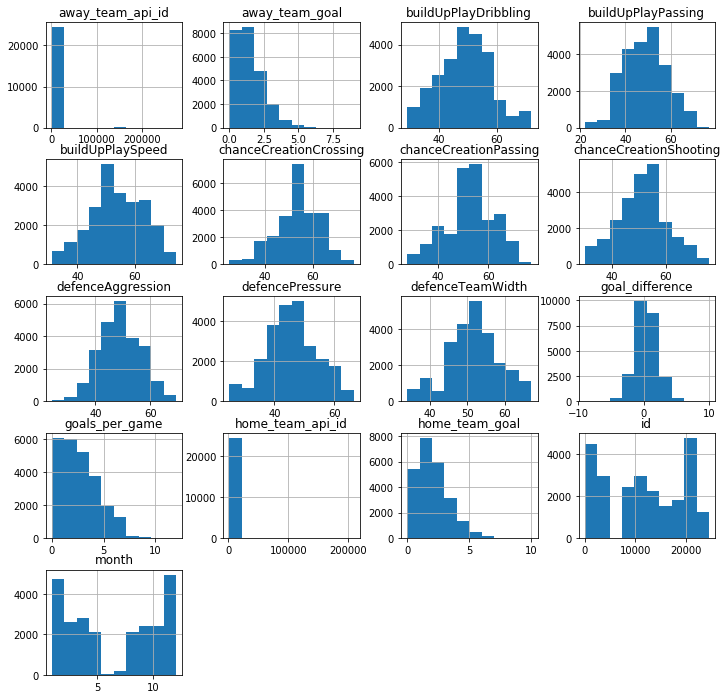

In [67]:
df.hist(figsize = (12,12));

**Figure-1:** Histogram plots for each attributes for combined dataframe 

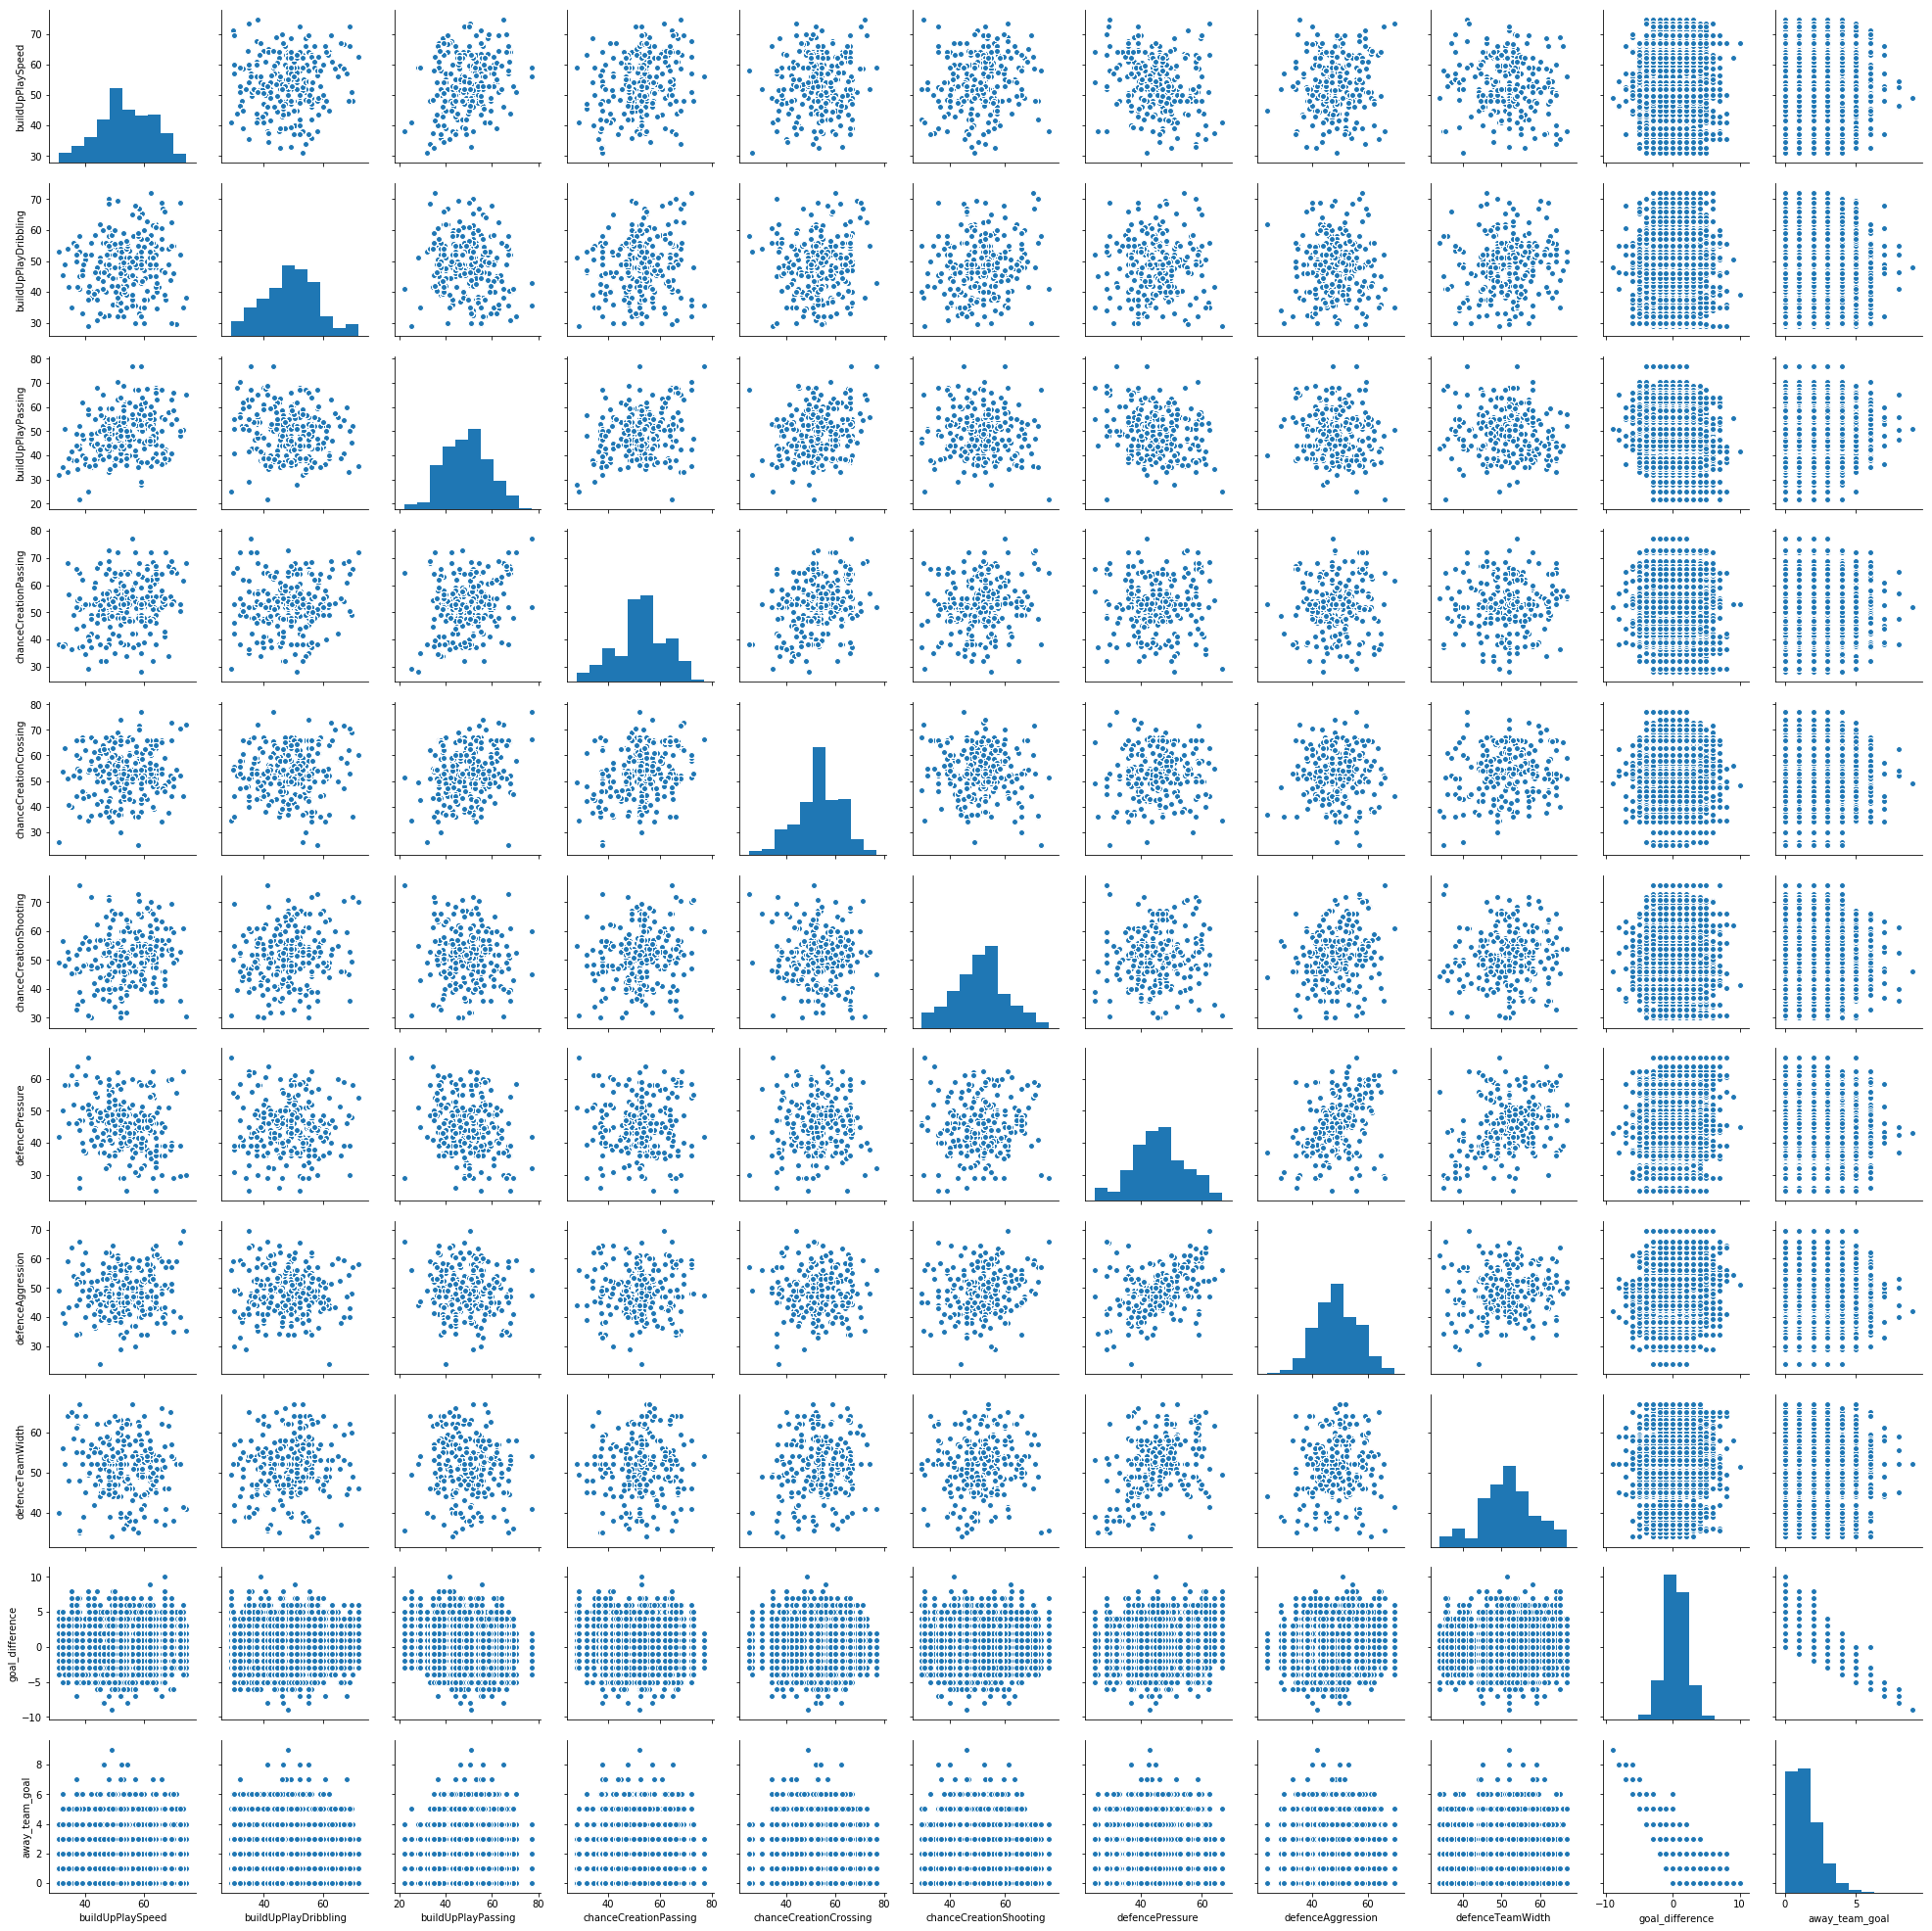

In [68]:
columns_for_pairplot = ['buildUpPlaySpeed', 'buildUpPlayDribbling', 'buildUpPlayPassing', 'chanceCreationPassing',
       'chanceCreationCrossing', 'chanceCreationShooting', 'defencePressure',
       'defenceAggression', 'defenceTeamWidth', 'goal_difference', 'away_team_goal']
sns.pairplot(df[columns_for_pairplot]);

**Figure-2:** Seaborn pairplot showing the correlation between attributes

It is difficult to extract consistent trend from **Figure-1:** and **Figure-2:** when all data points are plotted simultaneously. Therefore, analysis needs to be completed individually by league. Next section will compare teams attributes for individual leagues. 

In [136]:
def find_min_max_team(dataframe, column):
    '''
    This function computes the minimum and maximum values for the selected column.
    Inputs to this function are target dataframe and column selected for analysis.
    Outputs from this function are the minumum and the maximum values for selected column and the team name.
    '''
    minimum = df[df[column] == df[column].min()].groupby('team_name').mean()[column]
    maximum = df[df[column] == df[column].max()].groupby('team_name').mean()[column]
    
    return [minimum,maximum]

In [137]:
find_min_max_team(df, 'buildUpPlaySpeed')

[team_name
 Borussia Mönchengladbach    31.0
 Name: buildUpPlaySpeed, dtype: float64, team_name
 West Ham United    74.5
 Name: buildUpPlaySpeed, dtype: float64]

In [138]:
def find_min_max_country(dataframe, column):
    '''
    This function computes the minimum and maximum values for the selected column.
    Inputs to this function are target dataframe and column selected for analysis.
    Outputs from this function are the minumum and the maximum values for selected column and the country name.
    '''
    minimum = [df.groupby('country').mean().reset_index()[column].min()]
    maximum = [df.groupby('country').mean().reset_index()[column].max()]
    s1 = 'The minimum ' + column + ' value is ' + str(minimum)
    s2 = 'The maximum ' + column + ' value is ' + str(maximum)
    return s1,s2

In [139]:
find_min_max_country(df, 'buildUpPlayDribbling')

('The minimum buildUpPlayDribbling value is [38.73125]',
 'The maximum buildUpPlayDribbling value is [54.76774193548387]')

### 3.2. Detailed Data Analysis

#### 3.2.1. League Specific Analysis

##### 3.2.1.1. Comparing teams based on the average goal they scored and the average goal they conceeded to their opponents per game

In [71]:
German_teams_gpg = df.query('country == "Germany"').groupby('team_name').mean()
German_teams_gpg.sort_values('goal_difference')

,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,month,buildUpPlaySpeed,buildUpPlayDribbling,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth,id,goal_difference,goals_per_game
team_name,,,,,,,,,,,,,,,,,
SpVgg Greuther Fürth,8357.0,9188.941176,0.588235,2.117647,6.823529,60.0,60.0,45.5,55.0,44.5,49.0,48.5,52.0,64.0,7809.0,-1.529412,2.705882
FC St. Pauli,8152.0,9216.705882,1.235294,2.058824,6.705882,52.5,52.0,56.0,65.0,53.0,36.0,42.5,44.0,55.5,7809.0,-0.823529,3.294118
SV Darmstadt 98,8262.0,9213.411765,0.882353,1.705882,6.705882,59.0,43.0,77.0,52.0,77.0,45.0,32.0,56.0,41.0,7809.0,-0.823529,2.588235
VfL Bochum,9911.0,9211.735294,1.205882,1.852941,6.558824,53.5,46.0,52.5,58.5,47.0,51.0,46.0,50.0,58.0,7809.0,-0.647059,3.058824
SC Paderborn 07,8460.0,9220.705882,1.235294,1.823529,7.000000,70.0,46.0,58.5,54.0,48.0,59.5,29.0,42.0,53.5,7809.0,-0.588235,3.058824
DSC Arminia Bielefeld,9912.0,9216.882353,0.941176,1.529412,6.588235,62.0,49.0,55.0,56.0,51.0,52.0,36.0,54.0,48.0,7809.0,-0.588235,2.470588
FC Energie Cottbus,8398.0,9305.941176,1.117647,1.588235,6.588235,39.0,47.0,40.0,52.0,67.0,56.0,47.0,55.0,52.0,7809.0,-0.470588,2.705882
Eintracht Braunschweig,9776.0,9187.941176,1.058824,1.411765,6.764706,63.5,52.0,58.0,60.5,51.0,53.0,43.5,43.5,46.0,7809.0,-0.352941,2.470588
1. FC Kaiserslautern,8350.0,9164.500000,1.088235,1.382353,6.205882,57.5,51.0,52.5,51.5,61.5,57.5,44.0,49.0,51.0,7809.0,-0.294118,2.470588


In [72]:
German_teams_gcp = df.query('country == "Germany"').groupby('team_name').mean()
German_teams_gcp.sort_values('away_team_goal')

,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,month,buildUpPlaySpeed,buildUpPlayDribbling,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth,id,goal_difference,goals_per_game
team_name,,,,,,,,,,,,,,,,,
FC Bayern Munich,9823.0,9142.441176,2.808824,0.705882,6.720588,41.0,29.0,25.0,29.0,34.5,31.0,66.5,56.0,49.5,7809.0,2.102941,3.514706
Borussia Dortmund,9789.0,9144.441176,2.191176,0.823529,6.522059,73.5,35.0,50.5,61.5,44.0,61.0,62.5,69.5,41.5,7809.0,1.367647,3.014706
FC Schalke 04,10189.0,9120.911765,1.852941,1.014706,6.661765,48.5,48.5,43.5,53.0,58.5,39.0,53.0,55.0,48.0,7809.0,0.838235,2.867647
FC Ingolstadt 04,8234.0,9215.058824,1.294118,1.058824,6.411765,54.5,55.0,46.5,50.0,43.0,51.5,39.5,42.0,49.0,7809.0,0.235294,2.352941
1. FSV Mainz 05,9905.0,9126.235294,1.436975,1.084034,6.546218,63.5,48.5,55.0,52.0,39.0,44.0,54.0,61.0,49.5,7809.0,0.352941,2.521008
Bayer 04 Leverkusen,8178.0,9239.205882,1.985294,1.125000,6.566176,71.0,29.5,55.0,64.5,54.5,50.0,55.5,59.0,52.0,7809.0,0.860294,3.110294
Borussia Mönchengladbach,9788.0,9144.500000,1.779412,1.169118,6.698529,31.0,53.0,32.0,38.0,26.0,49.0,42.0,49.0,40.0,7809.0,0.610294,2.948529
Hamburger SV,9790.0,9144.382353,1.308824,1.257353,6.485294,43.5,58.5,55.0,61.0,65.5,54.5,44.5,36.5,56.0,7809.0,0.051471,2.566176
Hertha BSC Berlin,8177.0,9249.892157,1.166667,1.274510,6.549020,57.5,48.0,55.0,55.0,63.5,52.0,45.5,52.5,54.0,7809.0,-0.107843,2.441176


In **German** league, two analysis performed in this section revealed that **'FC Bayern Munich**' and **'Bochum'** are the best and the worst performing teams respectively. 

In [73]:
English_teams_gpg = df.query('country == "England"').groupby('team_name').mean()
English_teams_gpg.sort_values('goal_difference')

,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,month,buildUpPlaySpeed,buildUpPlayDribbling,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth,id,goal_difference,goals_per_game
team_name,,,,,,,,,,,,,,,,,
Cardiff City,8344.0,9267.526316,1.052632,1.842105,6.842105,60.0,35.0,60.5,52.0,51.0,43.5,33.0,41.0,39.0,1729.0,-0.789474,2.894737
Bournemouth,8678.0,9239.526316,1.210526,1.789474,6.315789,47.0,40.0,47.5,47.5,46.5,44.0,48.0,50.0,62.0,1729.0,-0.578947,3.000000
Wolverhampton Wanderers,8602.0,9098.403509,1.087719,1.666667,6.614035,46.5,32.0,56.0,55.0,55.5,52.0,47.0,48.0,53.5,1729.0,-0.578947,2.754386
Reading,9798.0,9278.421053,1.210526,1.736842,6.947368,44.0,31.0,68.0,66.5,52.0,39.5,54.5,49.5,52.0,1729.0,-0.526316,2.947368
Hull City,8667.0,9105.750000,1.039474,1.447368,6.828947,56.0,37.5,53.0,54.0,54.5,52.0,38.0,37.0,46.0,1729.0,-0.407895,2.486842
Wigan Athletic,8528.0,9142.673684,1.115789,1.494737,6.568421,51.0,36.5,53.5,52.0,57.0,48.5,62.0,52.5,44.0,1729.0,-0.378947,2.610526
Blackpool,8483.0,9067.000000,1.578947,1.947368,4.947368,64.5,40.0,68.0,64.5,45.5,61.0,39.0,38.0,54.0,1729.0,-0.368421,3.526316
Burnley,8191.0,9084.342105,1.026316,1.342105,6.789474,51.0,32.0,70.5,72.0,58.0,52.5,58.5,59.5,58.0,1729.0,-0.315789,2.368421
Queens Park Rangers,10172.0,9183.719298,1.052632,1.350877,6.736842,41.0,37.5,57.0,53.0,53.5,57.0,50.0,44.0,54.0,1729.0,-0.298246,2.403509


In [74]:
English_teams_gcp = df.query('country == "England"').groupby('team_name').mean()
English_teams_gcp.sort_values('away_team_goal')

,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,month,buildUpPlaySpeed,buildUpPlayDribbling,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth,id,goal_difference,goals_per_game
team_name,,,,,,,,,,,,,,,,,
Manchester United,10260.0,9083.447368,2.223684,0.789474,6.631579,42.0,38.0,49.0,49.0,58.0,48.0,48.0,47.0,56.0,1729.0,1.434211,3.013158
Arsenal,9825.0,9106.342105,2.013158,0.802632,6.546053,59.0,51.0,28.0,28.0,49.5,55.0,51.0,44.0,52.0,1729.0,1.210526,2.815789
Manchester City,8456.0,9178.394737,2.401316,0.822368,6.730263,59.0,35.0,29.0,35.0,42.5,43.0,45.0,45.5,54.0,1729.0,1.578947,3.223684
Chelsea,8455.0,9178.447368,2.190789,0.848684,6.664474,67.0,46.5,37.0,41.0,47.5,56.0,39.0,41.0,46.0,1729.0,1.342105,3.039474
Liverpool,8650.0,9168.184211,1.934211,0.881579,6.684211,68.5,54.0,38.5,34.0,37.5,53.5,51.0,50.0,61.5,1729.0,1.052632,2.815789
Tottenham Hotspur,8586.0,9171.552632,1.677632,0.907895,6.703947,44.0,40.5,39.0,41.0,50.0,62.5,60.5,52.5,56.0,1729.0,0.769737,2.585526
Birmingham City,8658.0,9002.973684,1.000000,0.921053,6.526316,56.0,35.5,77.0,77.0,66.5,60.0,42.0,47.5,54.0,1729.0,0.078947,1.921053
Watford,9817.0,9179.578947,1.052632,1.000000,6.631579,61.0,37.5,54.0,54.0,43.0,50.0,38.0,52.0,45.0,1729.0,0.052632,2.052632
Stoke City,10194.0,9086.921053,1.342105,1.046053,6.631579,48.0,32.5,52.0,51.0,58.0,43.0,41.0,38.5,46.0,1729.0,0.296053,2.388158


In **English Premiere** league, two analysis performed in this section revealed that **'Manchester City'** and **'Cardiff City'** are the best and the worst performing teams respectively.

In [75]:
Italian_teams_gpg = df.query('country == "Italy"').groupby('team_name').mean()
Italian_teams_gpg.sort_values('goal_difference')

,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,month,buildUpPlaySpeed,buildUpPlayDribbling,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth,id,goal_difference,goals_per_game
team_name,,,,,,,,,,,,,,,,,
Pescara,9878.0,9077.578947,0.789474,2.210526,6.947368,64.0,41.5,44.5,46.0,56.5,47.5,32.5,46.0,45.5,10257.0,-1.421053,3.000000
Novara,6269.0,9108.666667,1.055556,1.500000,6.277778,66.0,57.0,56.0,56.0,55.0,57.0,36.0,49.0,53.0,10257.0,-0.444444,2.555556
Frosinone,9891.0,19577.947368,0.947368,1.368421,6.263158,63.0,48.0,46.0,51.0,50.0,50.0,55.0,57.0,47.0,10257.0,-0.421053,2.315789
Livorno,8537.0,9101.263158,1.105263,1.526316,6.289474,58.0,58.0,67.0,38.0,25.0,73.0,30.0,57.0,35.0,10257.0,-0.421053,2.631579
Cesena,9880.0,9074.000000,0.927273,1.345455,6.290909,69.5,30.0,41.0,53.0,44.0,69.5,39.0,49.0,57.0,10257.0,-0.418182,2.272727
Reggio Calabria,8690.0,9062.894737,1.210526,1.421053,6.210526,52.0,55.0,56.0,57.0,74.0,53.0,38.0,48.0,52.0,10257.0,-0.210526,2.631579
Carpi,208931.0,9102.157895,1.210526,1.368421,6.263158,56.0,45.5,48.0,58.5,38.0,52.0,35.5,49.5,43.0,10257.0,-0.157895,2.578947
Sassuolo,7943.0,12658.789474,1.280702,1.421053,5.824561,57.0,68.0,60.0,61.0,57.0,59.5,46.0,47.0,44.5,10257.0,-0.140351,2.701754
Bologna,9857.0,10587.022901,1.183206,1.320611,6.229008,63.0,53.0,48.0,32.0,48.0,52.0,29.0,54.0,48.0,10257.0,-0.137405,2.503817


In [76]:
Italian_teams_gcp = df.query('country == "Italy"').groupby('team_name').mean()
Italian_teams_gcp.sort_values('away_team_goal')

,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,month,buildUpPlaySpeed,buildUpPlayDribbling,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth,id,goal_difference,goals_per_game
team_name,,,,,,,,,,,,,,,,,
Juventus,9885.0,10363.357616,2.033113,0.821192,6.039735,38.0,41.0,22.0,64.5,51.5,76.0,29.0,66.0,35.5,10257.0,1.211921,2.854305
Milan,8564.0,10433.258278,1.794702,0.847682,6.139073,48.0,70.0,52.0,66.0,36.0,72.0,58.0,57.0,49.0,10257.0,0.947020,2.642384
Napoli,9875.0,10384.993333,2.020000,0.906667,6.213333,62.5,72.0,35.5,72.0,60.0,70.0,54.0,58.0,46.0,10257.0,1.113333,2.926667
Roma,8686.0,10435.701987,1.980132,0.940397,6.066225,67.5,37.5,42.5,72.0,59.0,61.0,36.0,57.0,41.0,10257.0,1.039735,2.920530
Chievo Verona,8533.0,10431.302632,0.947368,0.967105,6.118421,66.0,54.0,67.0,52.0,66.0,52.0,46.0,59.0,51.0,10257.0,-0.019737,1.914474
Catania,8530.0,9119.168142,1.371681,0.982301,6.221239,72.5,52.0,48.0,53.0,52.0,36.0,29.5,65.5,52.0,10257.0,0.389381,2.353982
Lazio,8543.0,10434.576159,1.582781,1.000000,6.298013,58.5,67.0,54.5,68.0,71.5,70.5,59.0,59.5,59.5,10257.0,0.582781,2.582781
Parma,10167.0,9040.070796,1.336283,1.008850,6.274336,48.0,68.5,33.0,69.0,62.0,45.0,48.5,54.5,46.0,10257.0,0.327434,2.345133
Fiorentina,8535.0,10447.526667,1.640000,1.020000,6.146667,34.0,54.0,33.0,68.0,51.0,53.0,58.0,59.0,64.0,10257.0,0.620000,2.660000


In **Italian** league, two analysis performed in this section revealed that **'Juventus'** and **'Livorno'** are the best and the worst performing teams respectively.

Let's plot some statistics for aformentioned teams and analyze the data using scatter plots. 

**'Team Attributes'** dataframe had team statistics collected from different years, hence there were many entries for single team. To simplify the analysis after data merge, we only used the average of these statistics. However, we also need to understand how team's own statistics change over the year. Therefore, we only load the **'Team Attributes'** dataframe here and investigate changes of team attributes over time. 

In [77]:
team = pd.read_csv('data/soccer_database_team.csv')
team_attribute = pd.read_csv('data/soccer_database_team_attributes.csv')
# We need to change the date into a readable format and extract "year" column to display attributes over year.
team_attribute['date'] = pd.to_datetime(team_attribute['date'])
team_attribute['year'] = team_attribute['date'].dt.year

In [78]:
BayernMunich = team_attribute.query('team_api_id == 9823')
Bochum = team_attribute.query('team_api_id == 9911')
MancesterCity = team_attribute.query('team_api_id == 8456')
CardiffCity = team_attribute.query('team_api_id == 8344')
Juventus = team_attribute.query('team_api_id == 9885')
Livorno = team_attribute.query('team_api_id == 8537')

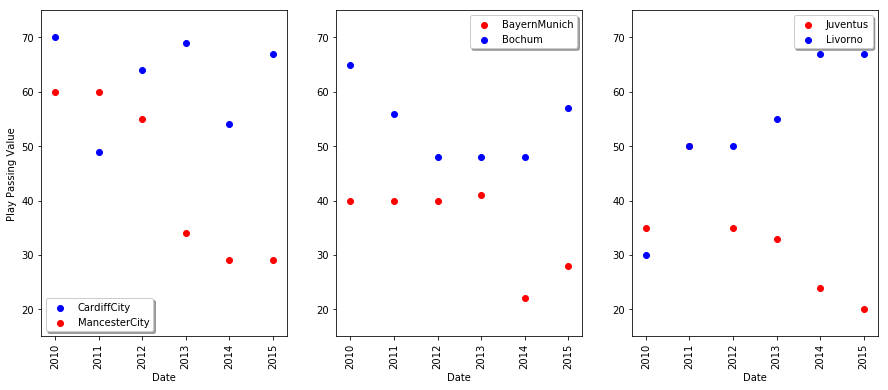

In [79]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15,6))
ax1.scatter(CardiffCity['year'], CardiffCity['buildUpPlayPassing'], color='b', label='CardiffCity')
ax1.scatter(MancesterCity['year'], MancesterCity['buildUpPlayPassing'], color='r', label='MancesterCity')
ax1.set_ylim([15, 75])
ax1.set_xlabel('Date')
ax1.tick_params(axis='x', rotation=90)
ax1.set_ylabel('Play Passing Value')
ax1.legend(shadow=True, fancybox=True)
ax2.scatter(BayernMunich['year'], BayernMunich['buildUpPlayPassing'], color='r', label='BayernMunich')
ax2.scatter(Bochum['year'], Bochum['buildUpPlayPassing'], color='b', label='Bochum')
ax2.set_ylim([15, 75])
ax2.set_xlabel('Date')
ax2.tick_params(axis='x', rotation=90)
ax2.legend(shadow=True, fancybox=True)
ax3.scatter(Juventus['year'], Juventus['buildUpPlayPassing'], color='r', label='Juventus')
ax3.scatter(Livorno['year'], Livorno['buildUpPlayPassing'], color='b', label='Livorno')
ax3.set_ylim([15, 75])
ax3.set_xlabel('Date')
ax3.tick_params(axis='x', rotation=90)
ax3.legend(shadow=True, fancybox=True)
plt.show()

**Figure-3:** Comparison of *Play Passing Value* attributes of the top and low performing teams in English (left), German (middle) and Italian (right) leagues.

As indicated in **Figure-3:**, top performing teams **Buildup Play Passing** attribute value decreased over time and overall remained as low numbers compared to low performing teams.

##### 3.2.1.2. Comparing national leagues using their attributes to invetigate the relationship between attributes

First let's create subset dataframe for each national league grouped by teams.

In [80]:
Germany = df.query('country == "Germany"').groupby('team_name').mean()
Spain = df.query('country == "Spain"').groupby('team_name').mean()
Italy = df.query('country == "Italy"').groupby('team_name').mean()
England = df.query('country == "England"').groupby('team_name').mean()
Netherlands = df.query('country == "Netherlands"').groupby('team_name').mean()
Portugal = df.query('country == "Portugal"').groupby('team_name').mean()

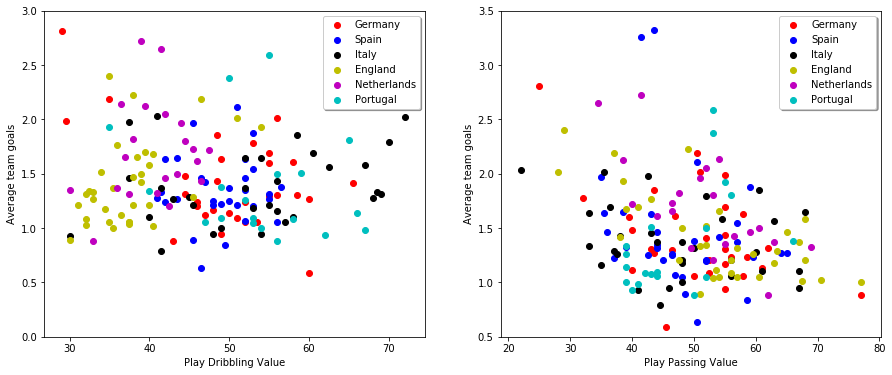

In [81]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15,6))
ax1.scatter(Germany['buildUpPlayDribbling'], Germany['home_team_goal'], color="r", label='Germany')
ax1.scatter(Spain['buildUpPlayDribbling'], Spain['home_team_goal'], color="b", label='Spain')
ax1.scatter(Italy['buildUpPlayDribbling'], Italy['home_team_goal'], color="k", label='Italy')
ax1.scatter(England['buildUpPlayDribbling'], England['home_team_goal'], color="y", label='England')
ax1.scatter(Netherlands['buildUpPlayDribbling'], Netherlands['home_team_goal'], color="m", label='Netherlands')
ax1.scatter(Portugal['buildUpPlayDribbling'], Portugal['home_team_goal'], color="c", label='Portugal')
ax1.set_ylim([0, 3])
ax1.set_ylabel('Average team goals')
ax1.set_xlabel('Play Dribbling Value')
ax1.legend(shadow=True, fancybox=True)
ax2.scatter(Germany['buildUpPlayPassing'], Germany['home_team_goal'], color="r", label='Germany')
ax2.scatter(Spain['buildUpPlayPassing'], Spain['home_team_goal'], color="b", label='Spain')
ax2.scatter(Italy['buildUpPlayPassing'], Italy['home_team_goal'], color="k", label='Italy')
ax2.scatter(England['buildUpPlayPassing'], England['home_team_goal'], color="y", label='England')
ax2.scatter(Netherlands['buildUpPlayPassing'], Netherlands['home_team_goal'], color="m", label='Netherlands')
ax2.scatter(Portugal['buildUpPlayPassing'], Portugal['home_team_goal'], color="c", label='Portugal')
ax2.set_ylim([0.5, 3.5])
ax2.set_ylabel('Average team goals')
ax2.set_xlabel('Play Passing Value')
ax2.legend(shadow=True, fancybox=True)
plt.show()

 **Figure-4:** (Left) Comparison of the relationship between *average goals* scored against *Play Dribbling* values amongst European Leagues. (Right) Comparison of the relationship between *aveage goals* scored against *Play Passing Values* amongst European Leagues. 

*Figure-4* shows that English teams have lower *Play Dribbling* values compared to other leagues such as Italy and Portugal which have higher *Play Dribbling* values.  

*Figure-4* demonstrates that there is a negative correlation between *average team goals* and *Play Passing" value. This means that teams which scored high amounts of goals per game has lower *Play Passing" value.

In [82]:
England.sort_values('goal_difference', ascending=[False])[1:10]

,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,month,buildUpPlaySpeed,buildUpPlayDribbling,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth,id,goal_difference,goals_per_game
team_name,,,,,,,,,,,,,,,,,
Manchester United,10260.0,9083.447368,2.223684,0.789474,6.631579,42.0,38.0,49.0,49.0,58.0,48.0,48.0,47.0,56.0,1729.0,1.434211,3.013158
Chelsea,8455.0,9178.447368,2.190789,0.848684,6.664474,67.0,46.5,37.0,41.0,47.5,56.0,39.0,41.0,46.0,1729.0,1.342105,3.039474
Arsenal,9825.0,9106.342105,2.013158,0.802632,6.546053,59.0,51.0,28.0,28.0,49.5,55.0,51.0,44.0,52.0,1729.0,1.210526,2.815789
Liverpool,8650.0,9168.184211,1.934211,0.881579,6.684211,68.5,54.0,38.5,34.0,37.5,53.5,51.0,50.0,61.5,1729.0,1.052632,2.815789
Tottenham Hotspur,8586.0,9171.552632,1.677632,0.907895,6.703947,44.0,40.5,39.0,41.0,50.0,62.5,60.5,52.5,56.0,1729.0,0.769737,2.585526
Southampton,8466.0,9260.447368,1.763158,1.078947,6.671053,49.5,36.0,43.0,42.0,55.0,40.5,56.0,64.5,44.0,1729.0,0.684211,2.842105
Leicester City,8197.0,9230.236842,1.657895,1.052632,6.473684,63.0,38.5,54.0,47.0,63.0,57.5,58.0,63.5,54.5,1729.0,0.605263,2.710526
Everton,8668.0,9167.236842,1.697368,1.092105,6.677632,52.0,39.5,41.0,39.0,46.0,55.5,52.0,58.0,59.5,1729.0,0.605263,2.789474
Stoke City,10194.0,9086.921053,1.342105,1.046053,6.631579,48.0,32.5,52.0,51.0,58.0,43.0,41.0,38.5,46.0,1729.0,0.296053,2.388158


In [83]:
# England.sort_values('goal_difference', ascending=[False])[1:10]
England.sort_values('goal_difference', ascending=[False]).iloc[1:10,-2]

team_name
Manchester United    1.434211
Chelsea              1.342105
Arsenal              1.210526
Liverpool            1.052632
Tottenham Hotspur    0.769737
Southampton          0.684211
Leicester City       0.605263
Everton              0.605263
Stoke City           0.296053
Name: goal_difference, dtype: float64

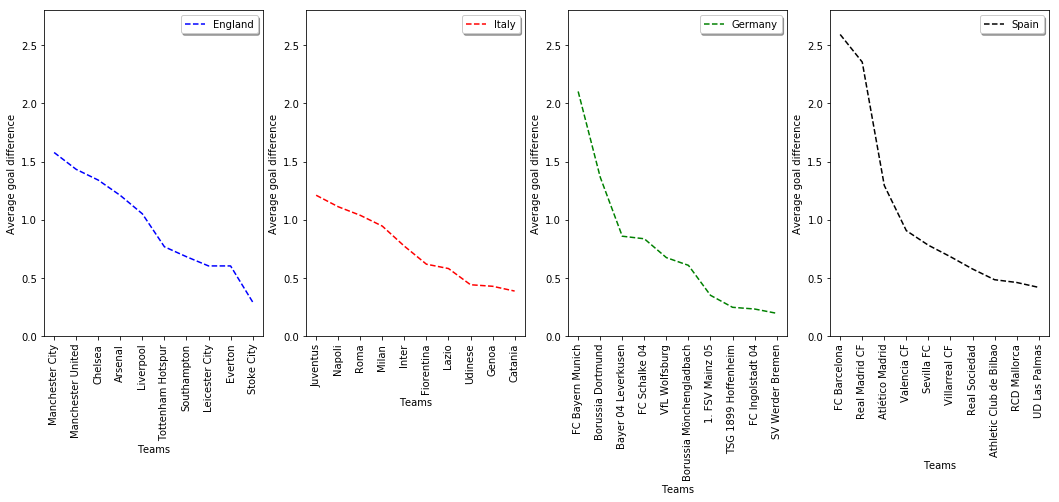

In [84]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize = (18,6))
ax1.plot(England.sort_values('goal_difference', ascending=[False]).iloc[0:10,-2], 'b--', label='England')
ax1.set_ylabel('Average goal difference')
ax1.tick_params(axis='x', rotation=90)
ax1.set_xlabel('Teams')
ax1.legend(shadow=True, fancybox=True)
ax1.set_ylim([0, 2.8])
ax2.plot(Italy.sort_values('goal_difference', ascending=[False]).iloc[0:10,-2], 'r--', label='Italy')
ax2.set_ylabel('Average goal difference')
ax2.tick_params(axis='x', rotation=90)
ax2.set_xlabel('Teams')
ax2.legend(shadow=True, fancybox=True)
ax2.set_ylim([0, 2.8])
ax3.plot(Germany.sort_values('goal_difference', ascending=[False]).iloc[0:10,-2], 'g--', label='Germany')
ax3.set_ylabel('Average goal difference')
ax3.tick_params(axis='x', rotation=90)
ax3.set_xlabel('Teams')
ax3.legend(shadow=True, fancybox=True)
ax3.set_ylim([0, 2.8])
ax4.plot(Spain.sort_values('goal_difference', ascending=[False]).iloc[0:10,-2], 'k--', label='Spain')
ax4.set_ylabel('Average goal difference')
ax4.tick_params(axis='x', rotation=90)
ax4.set_xlabel('Teams')
ax4.legend(shadow=True, fancybox=True)
ax4.set_ylim([0, 2.8])
plt.show()

** Figure-5:** Average goal difference statistics of top 10 scorer teams in four major European leagues

*Figure-5* shows that Spanish and German teams tend to have larger goal difference statistics compared to Italian and English teams. In Spanish league, the average goal difference of the top team is over 2.5 whereas this number is slightly above 1 for English top team. 

#### 3.2.2. Team Specific Analysis Evaluated for Individual Seasons

Let's compare total goal differences statistics amongs teams for 4 major European Leagues. We want to make this comparison for individual seasons to see whether the team's performances change over the years. Therefore, we first create subset dataframes for each of the major league grouped by season and team name. 

In [85]:
Germany_season = df.query('country == "Germany"').groupby(['season','team_name']).mean().reset_index()
Spain_season = df.query('country == "Spain"').groupby(['season','team_name']).mean().reset_index()
Italy_season = df.query('country == "Italy"').groupby(['season','team_name']).mean().reset_index()
England_season = df.query('country == "England"').groupby(['season','team_name']).mean().reset_index()

Now we can pull up four top teams from these four major leagues for plotting their goal difference performance changing over the soccer season.

In [86]:
ManchesterCity = England_season.query('team_name == "Manchester City"').sort_values('goal_difference', ascending=[False])
ManchesterUnited = England_season.query('team_name == "Manchester United"').sort_values('goal_difference', ascending=[False])
Chelsea = England_season.query('team_name == "Chelsea"').sort_values('goal_difference', ascending=[False])
Liverpool = England_season.query('team_name == "Liverpool"').sort_values('goal_difference', ascending=[False])

BayernMunich = Germany_season.query('team_name == "FC Bayern Munich"').sort_values('goal_difference', ascending=[False])
BorussiaDortmund = Germany_season.query('team_name == "Borussia Dortmund"').sort_values('goal_difference', ascending=[False])
Wolfsburg = Germany_season.query('team_name == "VfL Wolfsburg"').sort_values('goal_difference', ascending=[False])
BayernLeverkusen = Germany_season.query('team_name == "Bayer 04 Leverkusen"').sort_values('goal_difference', ascending=[False])

Juventus = Italy_season.query('team_name == "Juventus"').sort_values('goal_difference', ascending=[False])
Napoli = Italy_season.query('team_name == "Napoli"').sort_values('goal_difference', ascending=[False])
Milan = Italy_season.query('team_name == "Milan"').sort_values('goal_difference', ascending=[False])
Roma = Italy_season.query('team_name == "Roma"').sort_values('goal_difference', ascending=[False])

RealMadrid = Spain_season.query('team_name == "Real Madrid CF"').sort_values('goal_difference', ascending=[False])
Barcelona = Spain_season.query('team_name == "FC Barcelona"').sort_values('goal_difference', ascending=[False])
AtleticoMadrid = Spain_season.query('team_name == "Atlético Madrid"').sort_values('goal_difference', ascending=[False])
Valencia = Spain_season.query('team_name == "Valencia CF"').sort_values('goal_difference', ascending=[False])

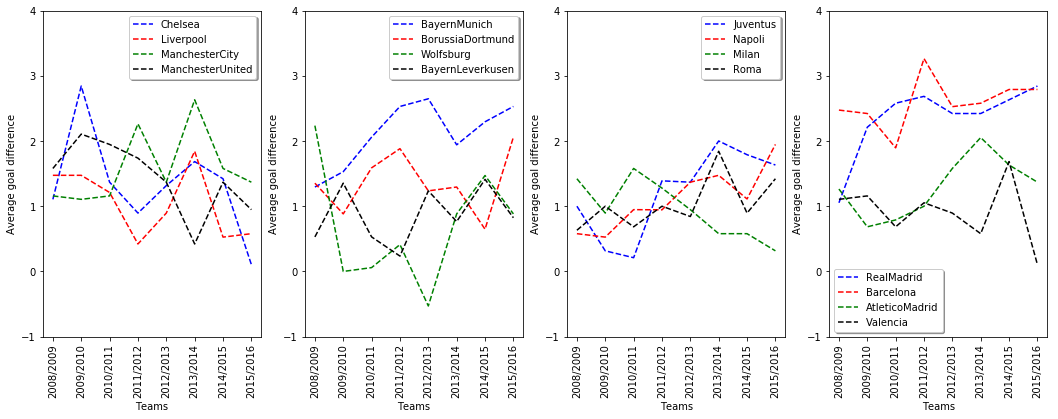

In [87]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize = (18,6))
ax1.plot(Chelsea.sort_values('season', ascending=[True]).iloc[0:8,0], Chelsea.sort_values('season', ascending=[True]).iloc[0:8,-2], 'b--', label='Chelsea')
ax1.plot(Liverpool.sort_values('season', ascending=[True]).iloc[0:8,0], Liverpool.sort_values('season', ascending=[True]).iloc[0:8,-2], 'r--', label='Liverpool')
ax1.plot(ManchesterCity.sort_values('season', ascending=[True]).iloc[0:8,0], ManchesterCity.sort_values('season', ascending=[True]).iloc[0:8,-2], 'g--', label='ManchesterCity')
ax1.plot(ManchesterUnited.sort_values('season', ascending=[True]).iloc[0:8,0], ManchesterUnited.sort_values('season', ascending=[True]).iloc[0:8,-2], 'k--', label='ManchesterUnited')
ax1.set_ylabel('Average goal difference')
ax1.tick_params(axis='x', rotation=90)
ax1.set_xlabel('Teams')
ax1.legend(shadow=True, fancybox=True)
ax1.set_ylim([-1, 4])
ax2.plot(BayernMunich.sort_values('season', ascending=[True]).iloc[0:8,0], BayernMunich.sort_values('season', ascending=[True]).iloc[0:8,-2], 'b--', label='BayernMunich')
ax2.plot(BorussiaDortmund.sort_values('season', ascending=[True]).iloc[0:8,0], BorussiaDortmund.sort_values('season', ascending=[True]).iloc[0:8,-2], 'r--', label='BorussiaDortmund')
ax2.plot(Wolfsburg.sort_values('season', ascending=[True]).iloc[0:8,0], Wolfsburg.sort_values('season', ascending=[True]).iloc[0:8,-2], 'g--', label='Wolfsburg')
ax2.plot(BayernLeverkusen.sort_values('season', ascending=[True]).iloc[0:8,0], BayernLeverkusen.sort_values('season', ascending=[True]).iloc[0:8,-2], 'k--', label='BayernLeverkusen')
ax2.set_ylabel('Average goal difference')
ax2.tick_params(axis='x', rotation=90)
ax2.set_xlabel('Teams')
ax2.legend(shadow=True, fancybox=True)
ax2.set_ylim([-1, 4])
ax3.plot(Juventus.sort_values('season', ascending=[True]).iloc[0:8,0], Juventus.sort_values('season', ascending=[True]).iloc[0:8,-2], 'b--', label='Juventus')
ax3.plot(Napoli.sort_values('season', ascending=[True]).iloc[0:8,0], Napoli.sort_values('season', ascending=[True]).iloc[0:8,-2], 'r--', label='Napoli')
ax3.plot(Milan.sort_values('season', ascending=[True]).iloc[0:8,0], Milan.sort_values('season', ascending=[True]).iloc[0:8,-2], 'g--', label='Milan')
ax3.plot(Roma.sort_values('season', ascending=[True]).iloc[0:8,0], Roma.sort_values('season', ascending=[True]).iloc[0:8,-2], 'k--', label='Roma')
ax3.set_ylabel('Average goal difference')
ax3.tick_params(axis='x', rotation=90)
ax3.set_xlabel('Teams')
ax3.legend(shadow=True, fancybox=True)
ax3.set_ylim([-1, 4])
ax4.plot(RealMadrid.sort_values('season', ascending=[True]).iloc[0:8,0], RealMadrid.sort_values('season', ascending=[True]).iloc[0:8,-2], 'b--', label='RealMadrid')
ax4.plot(Barcelona.sort_values('season', ascending=[True]).iloc[0:8,0], Barcelona.sort_values('season', ascending=[True]).iloc[0:8,-2], 'r--', label='Barcelona')
ax4.plot(AtleticoMadrid.sort_values('season', ascending=[True]).iloc[0:8,0], AtleticoMadrid.sort_values('season', ascending=[True]).iloc[0:8,-2], 'g--', label='AtleticoMadrid')
ax4.plot(Valencia.sort_values('season', ascending=[True]).iloc[0:8,0], Valencia.sort_values('season', ascending=[True]).iloc[0:8,-2], 'k--', label='Valencia')
ax4.set_ylabel('Average goal difference')
ax4.tick_params(axis='x', rotation=90)
ax4.set_xlabel('Teams')
ax4.legend(shadow=True, fancybox=True)
ax4.set_ylim([-1, 4])
plt.show()

** Figure-6:** Comparison of average goal difference of top four teams in four major European leagues over soccer season. 

Figure-6 indicates interesting statistics resulted from the comparing average goal difference statistics of major teams collected for each season. 
- **Manchester United** goal difference statistics seems to dropping over the years. In 2013-2014 season, Mancester United scored the worst goal difference statistics compared to other top three teams in English League.
- **Milan** goal difference performance also seems to be dropping over the years unlike other top three teams in Italy. In 2015-2016 season, **Milan** seems to have the lowest goal difference statistics whereas Napoli achived their highest number on this attribute. 
- In Spanish League, **Real Madrid** and **Barcelona** have the top two goal difference statistics almost every season. **Real Madrid** score in this area significantly improved over time since they had the highest score in 2015-2016 season. **Valencia** goal difference seems to be the lowest amongst four top Spanish teams for the same year.
- In Germany, **Bayern Munich** seems to have the highest goal difference statistics every season except the 2008-2009. Interestingly, 2008-2009 season's top scorer **Wolfsburg** performance became worse over the years. In 2012-2013, **Wolfsburg**'s goal difference statistics dropped to negative values. 

### 3.3. Research Questions

### Research Question 1: What kinds of properties are associated with teams that have winning statistics?

The **goal difference** statistics seem to associated with high winning statistics. Figure-6 demonstrated that some team's average goal difference performance change over the years. Statistics in the following lines will confirm that **goal difference** statistic highhly correlated with team's number of wins. 
- Example-1: Manchester United's performance seems be getting worse over the years as indicated by their goal difference statistics. The following line shows that their number of wins decreases in proportion to decrease on their goal difference. 

In [88]:
MU_wins = df.query('team_name == "Manchester United"').query('winner == "Win"')
MU_total_wins = len(df.query('team_name == "Manchester United"').query('winner == "Win"'))
MU_total_wins_20082009 = len(MU_wins.query('season == "2009/2010"'))
MU_total_wins_20132014 = len(MU_wins.query('season == "2013/2014"'))
s1 = 'Manchester United total home game win between 2008 and 2016 is ' + str(MU_total_wins) + '.'
s2 = 'Total win in 2008-2009 season is ' + str(MU_total_wins_20082009) + '.'
s3 = 'Total win in 2013-2014 season is ' + str(MU_total_wins_20132014)+ '.'
print(s1)
print(s2)
print(s3)

Manchester United total home game win between 2008 and 2016 is 116.
Total win in 2008-2009 season is 16.
Total win in 2013-2014 season is 9.


- Example-2: Another team whose goal difference also decreased significantly between 2008 and 2013 is Wolfsburg. Comparison of their total wins between those years also confirms that Volfsburg's winning performance also drops once their average goal difference numbers drops. This is demonstrated in the following line. 

In [89]:
W_wins = df.query('team_name == "VfL Wolfsburg"').query('winner == "Win"')
W_total_wins = len(df.query('team_name == "VfL Wolfsburg"').query('winner == "Win"'))
W_total_wins_20082009 = len(W_wins.query('season == "2008/2009"'))
W_total_wins_20122013 = len(W_wins.query('season == "2012/2013"'))
ss1 = 'VfL Wolfsburg total home game win between 2008 and 2013 is ' + str(W_total_wins) + '.'
ss2 = 'Total win in 2008-2009 season is ' + str(W_total_wins_20082009) + '.'
ss3 = 'Total win in 2012-2013 season is ' + str(W_total_wins_20122013)+ '.'
print(ss1)
print(ss2)
print(ss3)

VfL Wolfsburg total home game win between 2008 and 2013 is 74.
Total win in 2008-2009 season is 16.
Total win in 2012-2013 season is 3.


- Example-3: As shown in Figure-6, Juventus's goal difference increased quite a bit between 2008 and 2014. Comparison of their total wins between those years shows that Juventus's winning performance significantly improved from 2008 to 2014. This is demonstrated in the following line.

In [141]:
J_wins = df.query('team_name == "Juventus"').query('winner == "Win"')
J_total_wins = len(df.query('team_name == "Juventus"').query('winner == "Win"'))
J_total_wins_20102011 = len(J_wins.query('season == "2010/2011"'))
J_total_wins_20132014 = len(J_wins.query('season == "2013/2014"'))
ss1 = 'Juventus total home game win between 2010 and 2014 is ' + str(J_total_wins) + '.'
ss2 = 'Total win in 2010-2011 season is ' + str(J_total_wins_20102011) + '.'
ss3 = 'Total win in 2013-2014 season is ' + str(J_total_wins_20132014)+ '.'
print(ss1)
print(ss2)
print(ss3)

Juventus total home game win between 2010 and 2014 is 105.
Total win in 2010-2011 season is 8.
Total win in 2013-2014 season is 19.


### Research Question 2 : Is there a major difference between European leagues on certain metrics?

Figure-4 showed an interesting difference on European leagues comparison on one attribute. English leagues teams *Play Dribbling Attribute* seem to remain on low numbers compared to other leagues. The difference of *Play Dribbling Attribute* between European Leagues is also demonstrated in two figures in Figure-7. 

In [140]:
find_min_max_country(df, 'buildUpPlayDribbling')

('The minimum buildUpPlayDribbling value is [38.73125]',
 'The maximum buildUpPlayDribbling value is [54.76774193548387]')

Values listed above can be also demonstrated in the following plots and see which countries own those values.

C:\Users\Engin.Alkan\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


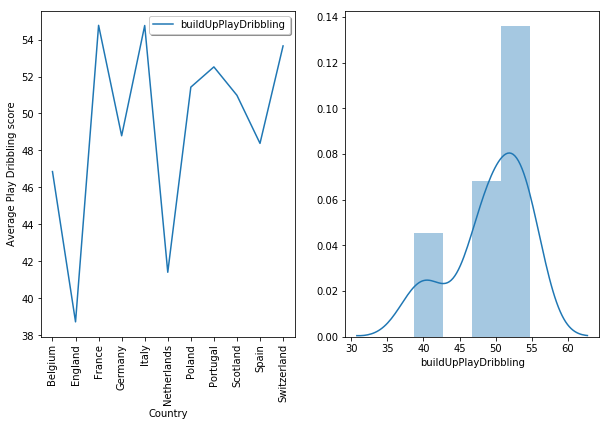

In [91]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,6))
ax1.plot(df.groupby('country')['buildUpPlayDribbling'].mean())
ax1.set_ylabel('Average Play Dribbling score')
ax1.tick_params(axis='x', rotation=90)
ax1.set_xlabel('Country')
ax1.legend(shadow=True, fancybox=True)
ax2 = sns.distplot(df.groupby('country')['buildUpPlayDribbling'].mean(),kde =True,hist = True)
plt.show()

** Figure-7:** (Left) Comparison of Average Play Dribbling score of European leagues over soccer season. (Right) Histogram plot showing the distribution of *Play Dribbling Attribute* attribute values amongs European leagues. 

### Research Question 3: What team attributes lead to the most victories?

*Play Passing* and *Defence Pressure* attributes seem to be related to team's victories. As shown in Figure-8, low *Play Passing* and high *Defence Pressure* scores seem to lead scoring more goals and hence high number of wins. 

In [92]:
ManchesterCity_wins = len(df.query('team_name == "Manchester City"').query('winner == "Win"'))
CardiffCity_wins = len(df.query('team_name == "Cardiff City"').query('winner == "Win"'))
BayernMunich_wins = len(df.query('team_name == "FC Bayern Munich"').query('winner == "Win"'))
Bochum_wins = len(df.query('team_name == "VfL Bochum"').query('winner == "Win"'))
Barcelona_wins = len(df.query('team_name == "FC Barcelona"').query('winner == "Win"'))
Livorno_wins = len(df.query('team_name == "Livorno"').query('winner == "Win"'))
s1 = 'Total number of wins for Manchester City is ' + str(ManchesterCity_wins) + '.'
s2 = 'Total number of wins for Cardiff City is ' + str(CardiffCity_wins) + '.'
s3 = 'Total number of wins for Bayern Munich is ' + str(BayernMunich_wins) + '.'
s4 = 'Total number of wins for Bochum is ' + str(Bochum_wins) + '.'
s5 = 'Total number of wins for Barcelona is ' + str(Barcelona_wins) + '.'
s6 = 'Total number of wins for Livorno is ' + str(Livorno_wins) + '.'
print(s1)
print(s2)
print(s3)
print(s4)
print(s5)
print(s6)

Total number of wins for Manchester City is 113.
Total number of wins for Cardiff City is 5.
Total number of wins for Bayern Munich is 109.
Total number of wins for Bochum is 7.
Total number of wins for Barcelona is 131.
Total number of wins for Livorno is 9.


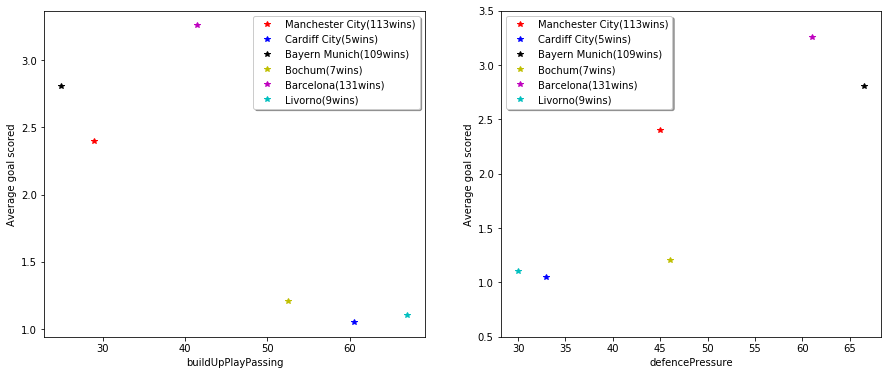

In [93]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15,6))
ax1.plot(df.query('team_name == "Manchester City"')['buildUpPlayPassing'].mean(),df.query('team_name == "Manchester City"')['home_team_goal'].mean(), 'r*', label='Manchester City(113wins)')
ax1.plot(df.query('team_name == "Cardiff City"')['buildUpPlayPassing'].mean(),df.query('team_name == "Cardiff City"')['home_team_goal'].mean(), 'b*', label='Cardiff City(5wins)')
ax1.plot(df.query('team_name == "FC Bayern Munich"')['buildUpPlayPassing'].mean(),df.query('team_name == "FC Bayern Munich"')['home_team_goal'].mean(), 'k*', label='Bayern Munich(109wins)')
ax1.plot(df.query('team_name == "VfL Bochum"')['buildUpPlayPassing'].mean(),df.query('team_name == "VfL Bochum"')['home_team_goal'].mean(), 'y*', label='Bochum(7wins)')
ax1.plot(df.query('team_name == "FC Barcelona"')['buildUpPlayPassing'].mean(),df.query('team_name == "FC Barcelona"')['home_team_goal'].mean(), 'm*', label='Barcelona(131wins)')
ax1.plot(df.query('team_name == "Livorno"')['buildUpPlayPassing'].mean(),df.query('team_name == "Livorno"')['home_team_goal'].mean(), 'c*', label='Livorno(9wins)')
#ax1.set_ylim([20, 80])
ax1.set_ylabel('Average goal scored')
#ax1.tick_params(axis='x', rotation=90)
ax1.set_xlabel('buildUpPlayPassing')
ax1.legend(shadow=True, fancybox=True)
ax2.plot(df.query('team_name == "Manchester City"')['defencePressure'].mean(),df.query('team_name == "Manchester City"')['home_team_goal'].mean(), 'r*', label='Manchester City(113wins)')
ax2.plot(df.query('team_name == "Cardiff City"')['defencePressure'].mean(),df.query('team_name == "Cardiff City"')['home_team_goal'].mean(), 'b*', label='Cardiff City(5wins)')
ax2.plot(df.query('team_name == "FC Bayern Munich"')['defencePressure'].mean(),df.query('team_name == "FC Bayern Munich"')['home_team_goal'].mean(), 'k*', label='Bayern Munich(109wins)')
ax2.plot(df.query('team_name == "VfL Bochum"')['defencePressure'].mean(),df.query('team_name == "VfL Bochum"')['home_team_goal'].mean(), 'y*', label='Bochum(7wins)')
ax2.plot(df.query('team_name == "FC Barcelona"')['defencePressure'].mean(),df.query('team_name == "FC Barcelona"')['home_team_goal'].mean(), 'm*', label='Barcelona(131wins)')
ax2.plot(df.query('team_name == "Livorno"')['defencePressure'].mean(),df.query('team_name == "Livorno"')['home_team_goal'].mean(), 'c*', label='Livorno(9wins)')
ax2.set_ylim([0.5, 3.5])
ax2.set_ylabel('Average goal scored')
#ax1.tick_params(axis='x', rotation=90)
ax2.set_xlabel('defencePressure')
ax2.legend(shadow=True, fancybox=True)
plt.show()

** Figure-8:** (Left) The relationship between average goals scored per game versus *Play Passing* attribute for the top and low performer teams. (Right) The relationship between average goals scored per game versus *Defence Pressure* attribute for the top and low performer teams. 

<a id='conclusions'></a>
## Conclusions


&emsp;The analysis of European soccer data consisted of individual and joined analysis of the country, league, matches, team and team atributes tables. Individually ananlysis allowed a better understanding of the data in terms of how values in the same table are related to each other. Joint analysis helped comparing certain statistics across various countries, leagues, and even amongst teams. Numerous functions available from the Panda library are used to compute important statistics of various attributes such as average values, total number of certain metric values, differences, etc. Panda library functions such as datetime, isnan, astype and dropna are used to change data formats and process defected data values. Many Panda library functions such as groupby, sort, query, describe, and info are used to pull certain set of data values and analyze them with different perspective. Analysis resulted in finding interesting statistics for various teams, different leagues and countries. Comparison of respective values resulted in drawing important conclusions in the light of some connections that were found between two or many variables.Data comparison amongst many attributes resulted to find answers to three research questions. In this analysis, multiple visualizing methods including seaborn library, matplotlib library's line, scatter and histogram plot are used to communicate the results and demonstrate findings as a result exploratory data analysis.

#### **Results**: My analysis suggests that
1. English soccer league seems to have lower Play Dribble Attribute values compared to the other European leagues. Italy and France are two countries which have higher values on this category. 
2. when team's individual performances analyzed over years, Manchester United seems to regress whereas Juventus seems to be improving their statistics over the years. 
3. German team Wolfsburg had the worst regression between 2008-2009 and 2012-2013. Although they achieved the highest goal difference performance in 2008-2009 season, this statistics dropped significantly over the years and became negative on 2012-2013 season. 
4. goal difference attribute leads to higher number of wictories. Teams who hold higher goal differential statistics won more games compared to those who have low goal difference attributes. 
5. there is a negative correlation between average team goals and "Play Passing" values. This means that teams which scored high amounts of goals per game has lower Play Passing" value.

#### **Limitations**: The following limitations are observed during the data wrangling and exploratory data analysis steps:
1. Some attributes (e.g. buildUpPlayDribbling) contained significantly high NaN values. Not having the large amounts of these attributes made analysis difficult to compare teams in this category.
2. The large range of variation on team attributes in the same European league created some challenges to make comparison amongst European leagues. It was challenging to draw meaningful relationship from common histogram or seaborn pairplots. Therefore, teams with the lowest and highest scores in these categories are included to draw meaningful conclusions from the analysis.  
3. Some values listed in certain team attributes showed great variation even for the same team. This made it difficult to draw some conclusions about team's performance. 
4. Some attributes contained different range of dates for some teams and even for some leagues. This resulted in different data points for some teams. This may created some bias on some part of the analysis. All my analysis are based on my observations presented in extensive amounts of the data. It is possible to come up with different results when various attributes are compared for individual teams.
